## **【問題1】コンペティション内容の確認**<br>
* 何を学習し、何を予測するのか<br>
個人のクレジットの情報や以前の応募情報などから、各データが債務不履行になるかどうかを予測する問題です。<br>
* どのようなファイルを作りKaggleに提出するか<br>
提出ファイル<br>
SK_ID_CURR テストセットのそれぞれについて、TARGET変数の確率を予測する必要があります。<br>
* 提出されたものはどういった指標値で評価されるのか<br>
AUC (area under the ROC curve)<br>AUCは指標の名前通りROC 曲線下の面積（積分）となります。この曲線の面積(AUC)が大きいと、偽陽性率が低い（でたらめに陽性と決めつけない）上に、真陽性率が高い（陽性のものは正しく検出できる）モデルです。

## **【問題2】学習と検証**
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
import pandas as pd

print("")
print("pd.read_csv()を使用して、変数に格納")
print("")
application_train = pd.read_csv('application_train.csv')


application_test = pd.read_csv('application_test.csv')


pd.read_csv()を使用して、変数に格納



In [12]:
#データフレームの列（columns　axis＝1のこと）を隠さず全て表示
pd.set_option("display.max_columns", None)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
application_train.shape

(307511, 122)

In [14]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [16]:
application_train.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,-0.002575,0.003042,0.001961,-0.001411,0.001890,0.005245,-0.001058,0.005017,-0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,-0.001923,0.001920,0.001988,-0.001647,0.001366,0.005777,-0.001036,0.005067,-0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,-0.003020,0.002440,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155317,-0.160472,-0.178919,-0.029498,-0.022746,-0.009728,-0.022149,-0.018550,-0.034199,-0.019172,-0.044003,-0.033614,-0.010885,-0.025031,-0.032997,-0.003176,-0.013578,-0.027284,-0.019952,-0.009036,-0.022068,-0.016340,-0.032131,-0.017387,-0.043226,-0.032698,-0.010174,-0.023393,-0.030685,-0.001557,-0.012711,-0.029184,-0.022081,-0.009993,-0.022326,-0.018573,-0.033863,-0.019025,-0.043768,-0.033394,-0.011256,-0.024621,-0.032739,-0.002757,-0.013337,-0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.0000

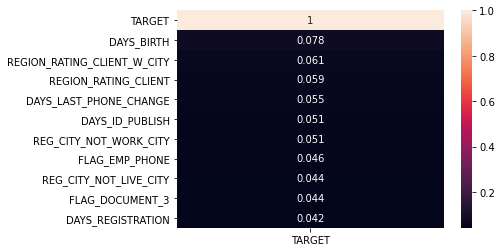

,TARGET
TARGET,1.000000
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
FLAG_EMP_PHONE,0.045982
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_DOCUMENT_3,0.044346


In [17]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt

application_train_corr_ten = application_train.corr()[['TARGET']].sort_values(by='TARGET', ascending=False).head(11)
sns.heatmap(application_train_corr_ten, annot=True)
plt.show()
application_train_corr_ten

In [18]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [19]:
application_train['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [20]:
application_train['DAYS_BIRTH'].value_counts().values

array([43, 42, 41, ...,  1,  1,  1])

<AxesSubplot:>

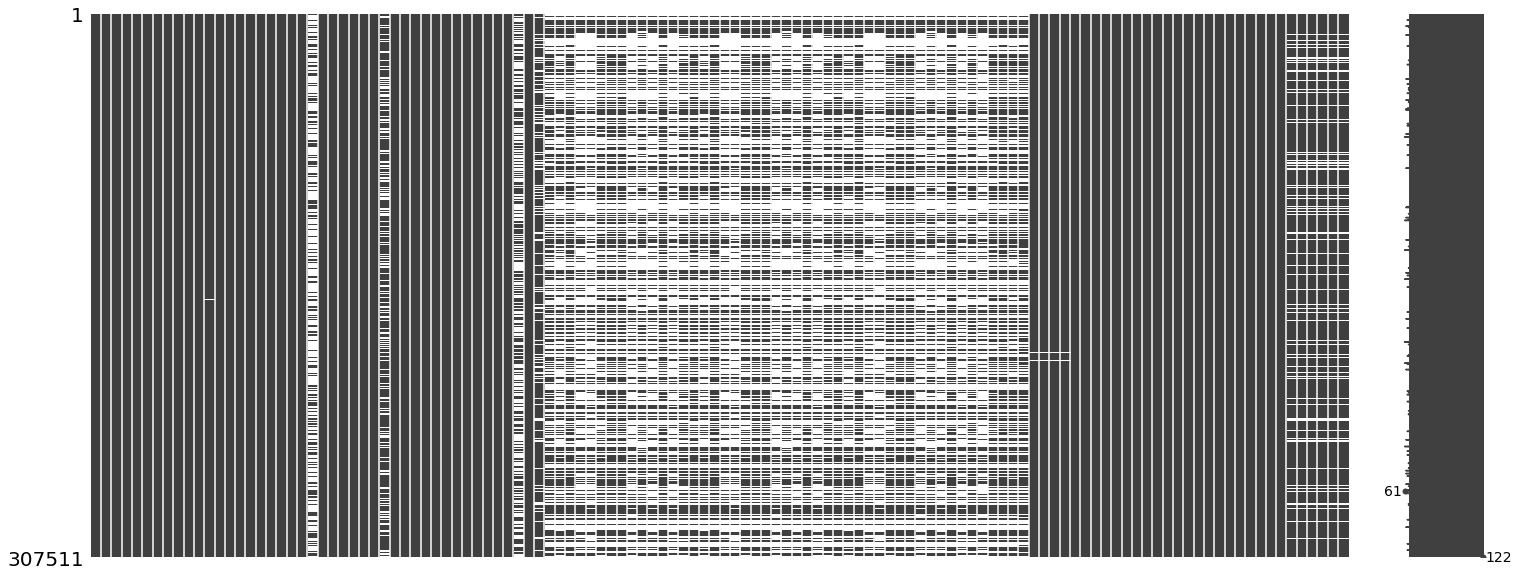

In [21]:
import missingno as msno
# 全体像を見る
msno.matrix(application_train)

In [22]:
n_samples = len(application_train)# サンプル数を求める
n_samples

307511

In [23]:
thresh_n = n_samples - 5 # サンプル数-欠損値の正常値を残す
application_train_col = application_train.dropna(thresh=thresh_n, axis=1)# .dropnaを使用して5つ以上欠損値がある列を削除する
application_train_col

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
threshold = 0 # この値以下の欠損率の特徴量は表示しない
n_missing = application_train.isnull().sum() 
print("欠損数が{}より多い特徴量の一覧\n{}".format(threshold, n_missing[n_missing>threshold]))

欠損数が0より多い特徴量の一覧
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [25]:
# 5つ以上欠損値がある列を削除したapplication_train_colから欠損値がある行を削除
application_train_select = application_train_col.dropna(axis=0,how='any')

<AxesSubplot:>

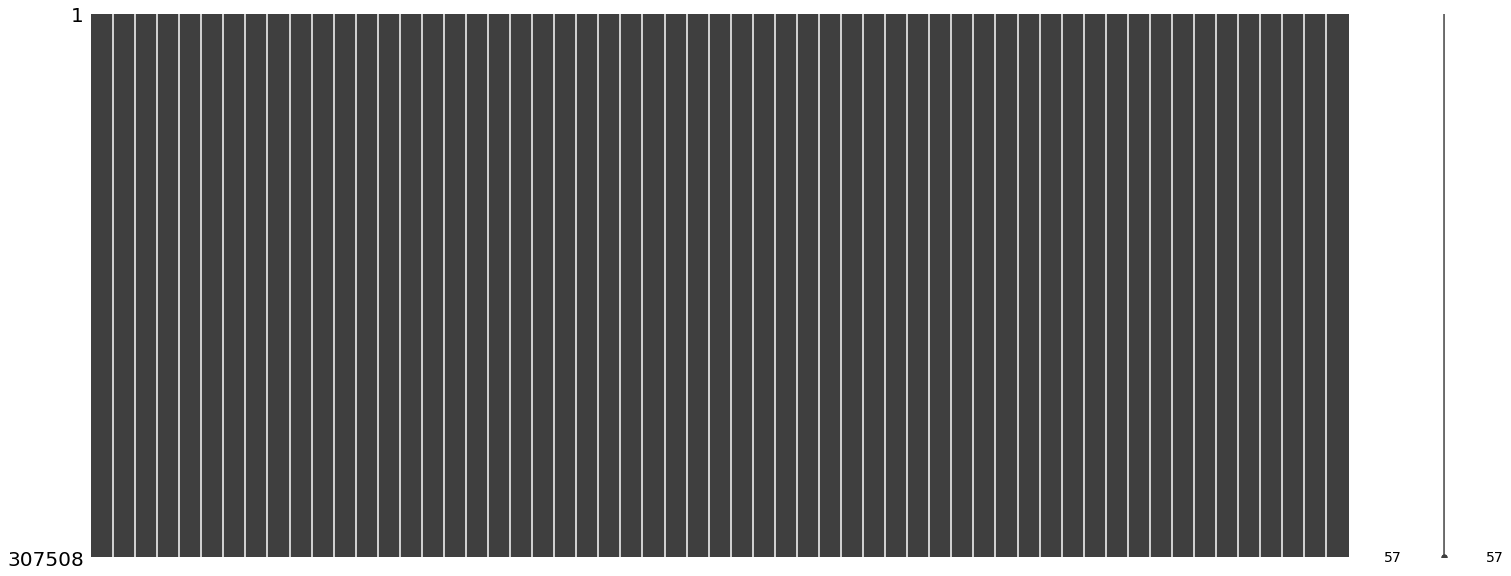

In [26]:
# 欠損がないことを確認
msno.matrix(application_train_select)

In [27]:
application_train_select_corr = application_train_select.corr()

In [28]:
application_train_select_corr.style.background_gradient(axis=None)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002111,-0.001134,-0.001817,-0.000346,0.000843,-0.001489,0.001363,-0.000972,-0.000383,nan,-0.001333,-0.000408,0.002815,0.002757,0.000279,-0.002896,-0.001075,-0.001138,0.000355,-0.000284,0.001114,0.002922,-0.001887,-0.001577,0.000074,-0.000858,0.000700,-0.003424,-0.004139,-0.001065,0.002119,-0.002807,0.001825,0.001504,-0.000815,-0.002013,-0.001045,0.000896,-0.001078,0.002603,-0.000725,0.001450,0.000565,0.000167,0.001073,0.000282
TARGET,-0.002111,1.000000,0.019186,-0.003981,-0.030370,-0.037228,0.078243,-0.044933,0.041976,0.051459,nan,0.045984,0.028526,0.000370,-0.023806,-0.001759,0.009308,0.058899,0.060893,-0.024164,0.005576,0.006946,0.002824,0.044395,0.050996,0.032520,0.055219,0.005417,0.044342,-0.002672,-0.000308,-0.028603,-0.001462,-0.008038,-0.004353,-0.001414,-0.004230,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007943,-0.001358,0.000215,0.003709
CNT_CHILDREN,-0.001134,0.019186,1.000000,0.012884,0.002144,-0.025574,0.330947,-0.239821,0.183399,-0.028017,nan,0.240717,0.055632,-0.000794,-0.029905,0.022617,0.879161,0.025422,0.024781,-0.007289,-0.013320,0.008192,0.014844,0.020070,0.070652,0.069960,-0.005864,0.001786,0.056829,-0.003709,-0.016724,-0.157026,-0.001374,0.051703,-0.001998,-0.002756,-0.005318,0.000293,0.003944,-0.005460,0.003609,0.010662,0.000773,0.004052,0.000864,0.000988,-0.002450
AMT_INCOME_TOTAL,-0.001817,-0.003981,0.012884,1.000000,0.156870,0.074797,0.027259,-0.064222,0.027803,0.008510,nan,0.063993,-0.017201,-0.008290,0.000153,0.038379,0.016341,-0.085465,-0.091735,0.036456,0.031192,0.062326,0.058042,0.003575,0.006424,0.008277,-0.018586,-0.001000,-0.016746,0.000529,0.001476,-0.045877,0.003824,0.072455,0.018389,0.000290,0.002315,0.002540,0.022747,0.020708,0.010793,0.007269,0.002231,0.003137,0.002408,0.000242,-0.000589
AMT_CREDIT,-0.000346,-0.030370,0.002144,0.156870,1.000000,0.099737,-0.055432,-0.066839,0.009621,-0.006571,nan,0.065520,-0.021087,0.023653,0.026210,0.016631,0.063159,-0.101777,-0.110916,0.052738,0.024010,0.051927,0.052608,-0.026887,-0.018859,0.000078,-0.073701,0.008905,0.096363,0.000630,-0.011763,-0.046717,-0.004066,0.082830,0.022602,-0.003100,0.028986,0.003857,0.052429,0.048828,0.032252,0.061925,0.011743,0.034365,0.021082,0.031023,-0.016148
REGION_POPULATION_RELATIVE,0.000843,-0.037228,-0.025574,0.074797,0.099737,1.000000,-0.029579,-0.003980,-0.053821,-0.003994,nan,0.004045,-0.015625,-0.012478,0.090941,0.040012,-0.024209,-0.532878,-0.531537,0.171286,0.002118,0.056952,0.081025,-0.050500,-0.044055,-0.015185,-0.044014,-0.003040,-0.084647,0.008102,0.016045,0.000727,0.002278,0.088534,0.038434,0.001992,0.024632,-0.000404,0.031186,0.032202,0.009446,0.006313,0.007414,0.013396,0.002364,-0.000045,0.003437
DAYS_BIRTH,-0.001489,0.078243,0.330947,0.027259,-0.055432,-0.029579,1.000000,-0.615864,0.331911,0.272687,nan,0.619888,0.172458,-0.014985,-0.042402,0.088212,0.278896,0.009362,0.008074,0.091060,0.065488,0.095812,0.069559,0.180387,0.242404,0.158882,0.082938,-0.001191,0.109685,-0.002789,0.016755,-0.407160,0.001309,0.113229,0.018214,-0.000168,0.044717,0.000236,0.026333,0.030734,0.012953,0.024046,0.007877,0.044446,0.003614,0.009015,0.027282
DAYS_EMPLOYED,0.001363,-0.0449

In [29]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [30]:
count = pd.value_counts(application_train['TARGET'], sort = True)
count

0    282686
1     24825
Name: TARGET, dtype: int64

In [31]:
df_selected = application_train.query("TARGET in [0, 1]").loc[:, ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "TARGET"]]
df_selected.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,TARGET
0,0,202500.0,1
1,0,270000.0,0
2,0,67500.0,0
3,0,135000.0,0
4,0,121500.0,0


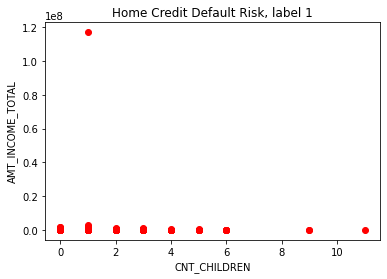

In [32]:
x_0 = df_selected[df_selected.TARGET==1].iloc[:, 0]# CNT_CHILDRENでラベル1
y_0 = df_selected[df_selected.TARGET==1].iloc[:, 1]# AMT_INCOME_TOTALでラベル1

plt.title("Home Credit Default Risk, label 1")
plt.xlabel("CNT_CHILDREN")
plt.ylabel("AMT_INCOME_TOTAL")
plt.scatter(x_0, y_0, c='red')

<AxesSubplot:xlabel='TARGET', ylabel='CNT_CHILDREN'>

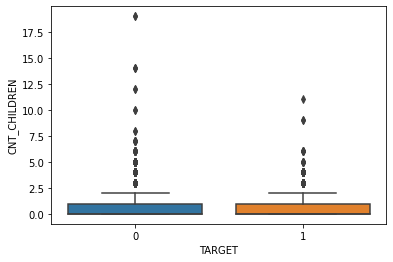

In [33]:
sns.boxplot(x="TARGET", y="CNT_CHILDREN", data=df_selected)

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

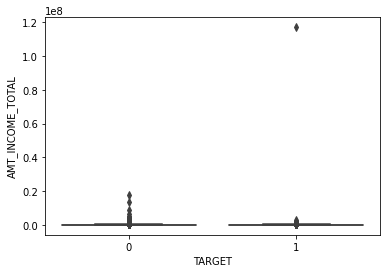

In [34]:
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=df_selected)

<AxesSubplot:xlabel='TARGET', ylabel='CNT_CHILDREN'>

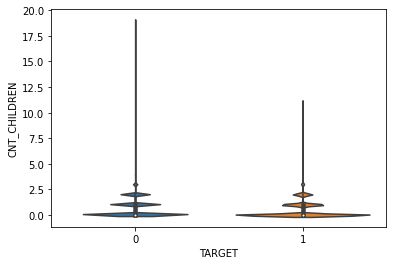

In [35]:
sns.violinplot(x="TARGET", y="CNT_CHILDREN", data=df_selected)

In [36]:
from sklearn.model_selection import train_test_split
# DataFrameをndarrayへ変換
df_selected_ndarray = df_selected.values
df_selected_ndarray

# 特徴量（説明変数）をX_ndarray、正解（目的変数）をy_ndarrayというndarrayに格納
X_ndarray = df_selected_ndarray[ : , 0:2]
y_ndarray = df_selected_ndarray[ : , 2]

X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, test_size=0.25)

In [38]:
from sklearn.preprocessing import StandardScaler
# fit_transform:パラメータ計算とデータ変換をまとめて実行
# fit:パラメータ（平均や標準偏差 etc）計算
#　transform:パラメータをもとにデータ変換
#データの標準化
scl = StandardScaler()

#学習用データで標準化
scl.fit(X_train) 
X_train_transformed = scl.transform(X_train)
X_test_transformed = scl.transform(X_test)

In [109]:
print("")
print("ロジスティック回帰")
print("")

#必要なモジュールをインポート
from sklearn.linear_model import LogisticRegression
 
#ロジスティック回帰のインスタンスを作成
lgr = LogisticRegression()

#ロジスティック回帰でデータを学習
lgr.fit(X_train_transformed, y_train)
 
#ロジスティック回帰でアヤメの種類を予測
label_pred_lgr = lgr.predict(X_test_transformed)


ロジスティック回帰



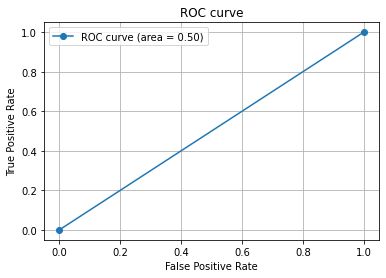

0.5


In [110]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

auc = metrics.roc_auc_score(y_test, label_pred_lgr)
# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, label_pred_lgr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

print(auc)


決定木

[0. 0. 0. ... 0. 0. 0.]


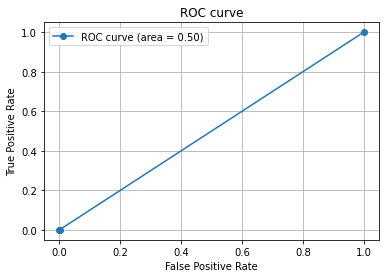

0.49992293269864835


In [111]:
print("")
print("決定木")
print("")
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import graphviz

dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformed, y_train)
label_pred_dtc = dtc.predict(X_test_transformed)
print(label_pred_dtc)

auc = metrics.roc_auc_score(y_test, label_pred_dtc)
# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, label_pred_dtc)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

print(auc)

## **【問題3】テストデータに対する推定**

In [112]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [113]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [114]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [187]:
application_test['CNT_CHILDREN']
application_test['AMT_INCOME_TOTAL']
df_test_selected = application_test.loc[:, ["CNT_CHILDREN", "AMT_INCOME_TOTAL"]]

df_test_selected_ndarray = df_test_selected.values
df_test_selected_ndarray

df_test_selected_transformed = scl.transform(df_test_selected_ndarray)
df_test_pred_dtc = dtc.predict(df_test_selected_transformed)

df_test_pred_dtc

array([1., 1., 1., ..., 1., 1., 1.])

## **【問題4】特徴量エンジニアリング**

どの特徴量を使うか<br>
どう前処理をするか<br>

### ①特徴量　DAYS_BIRTH, DAYS_EMPLOYED、手法　決定木


①
特徴量　DAYS_BIRTH, DAYS_EMPLOYED
手法　決定木

auc : 0.5125811446607962


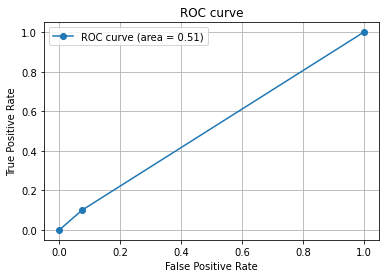

In [196]:
# 列抽出　特徴量　DAYS_BIRTH, DAYS_EMPLOYED
df_selected = application_train.query("TARGET in [0, 1]").loc[:, ["DAYS_BIRTH", "DAYS_EMPLOYED", "TARGET"]]


# absで絶対値、日数/３６５で年に換算
series_selected_0 = abs(df_selected.iloc[:,0]/365)
series_selected_1 = abs(df_selected.iloc[:,1]/365)
series_selected_2 = series_selected.iloc[:,2]
# 列結合
df_selected_2 = pd.concat([series_selected_0, series_selected_1, series_selected_2],axis=1)


# DataFrameをndarrayへ変換
df_selected_2_ndarray = df_selected_2.values
# 特徴量（説明変数）をX_ndarray、正解（目的変数）をy_ndarrayというndarrayに格納
X_2_ndarray = df_selected_2_ndarray[ : , 0:2]
y_2_ndarray = df_selected_2_ndarray[ : , 2]


#インポート
from sklearn.model_selection import train_test_split
#分割
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_ndarray, y_2_ndarray, test_size=0.25, random_state=42)


#データの標準化
from sklearn.preprocessing import StandardScaler
# fit_transform:パラメータ計算とデータ変換をまとめて実行
#　transform:パラメータをもとにデータ変換
scl = StandardScaler()
#学習用データで標準化
# fit:パラメータ（平均や標準偏差 etc）計算
scl.fit(X_2_train) 
X_2_train_transformed = scl.transform(X_2_train)
X_2_test_transformed = scl.transform(X_2_test)


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import graphviz

dtc = DecisionTreeClassifier()
dtc.fit(X_2_train_transformed, y_2_train)
label_pred_dtc_2 = dtc.predict(X_2_test_transformed)

auc = metrics.roc_auc_score(y_2_test, label_pred_dtc_2)
# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_2_test, label_pred_dtc_2)

print("")
print("①\n特徴量　DAYS_BIRTH, DAYS_EMPLOYED\n手法　決定木")
print("")
print('auc : {}'.format(auc))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


### ②特徴量　DAYS_BIRTH, DAYS_EMPLOYED、手法　ロジスティック回帰


②
特徴量　DAYS_BIRTH, DAYS_EMPLOYED
手法　ロジスティック回帰

auc : 0.5


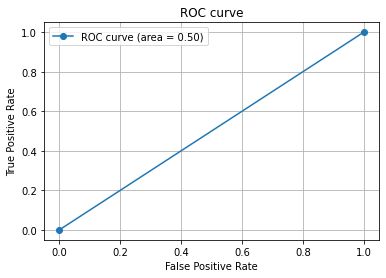

In [197]:
#必要なモジュールをインポート
from sklearn.linear_model import LogisticRegression
 #ロジスティック回帰のインスタンスを作成
lgr = LogisticRegression()
#ロジスティック回帰でデータを学習
lgr.fit(X_2_train_transformed, y_2_train)
 #ロジスティック回帰でアヤメの種類を予測
label_pred_lgr = lgr.predict(X_2_test_transformed)


import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

auc = metrics.roc_auc_score(y_2_test, label_pred_lgr)
# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_2_test, label_pred_lgr)

print("")
print("②\n特徴量　DAYS_BIRTH, DAYS_EMPLOYED\n手法　ロジスティック回帰")
print("")
print('auc : {}'.format(auc))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## ③特徴量　AMT_ANNUITY, AMT_INCOME_TOTAL、手法　決定木


③
特徴量　AMT_ANNUITY, AMT_INCOME_TOTAL
手法　決定木

auc : 0.504302954627754


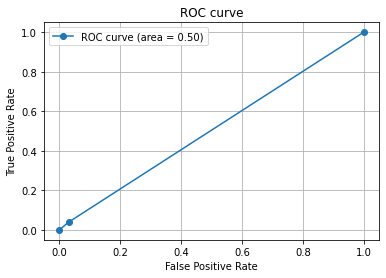

In [200]:
# 抽出を結合
df_selected_3 = application_train.query("TARGET in [0, 1]").loc[:, ["AMT_ANNUITY", "AMT_INCOME_TOTAL", "TARGET"]]
# 欠損値があるサンプル（行）は削除する。
df_selected_3_delete = df_selected_3.dropna(axis=0,how='any')

# DataFrameをndarrayへ変換
df_selected_3_ndarray = df_selected_3_delete.values
# 特徴量（説明変数）をX_ndarray、正解（目的変数）をy_ndarrayというndarrayに格納
X_3_ndarray = df_selected_3_ndarray[ : , 0:2]
y_3_ndarray = df_selected_3_ndarray[ : , 2]

#インポート
from sklearn.model_selection import train_test_split
#分割
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3_ndarray, y_3_ndarray, test_size=0.25, random_state=42)
#インポート
from sklearn.preprocessing import StandardScaler
# fit_transform:パラメータ計算とデータ変換をまとめて実行
# fit:パラメータ（平均や標準偏差 etc）計算
#　transform:パラメータをもとにデータ変換
#データの標準化
scl = StandardScaler()

#学習用データで標準化
scl.fit(X_3_train) 
X_3_train_transformed = scl.transform(X_3_train)
X_3_test_transformed = scl.transform(X_3_test)


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import graphviz

dtc = DecisionTreeClassifier()
dtc.fit(X_3_train_transformed, y_3_train)
label_pred_dtc_3 = dtc.predict(X_3_test_transformed)


auc = metrics.roc_auc_score(y_3_test, label_pred_dtc_3)
# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_3_test, label_pred_dtc_3)


print("")
print("③\n特徴量　AMT_ANNUITY, AMT_INCOME_TOTAL\n手法　決定木")
print("")
print('auc : {}'.format(auc))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## ④特徴量　CODE_GENDER,AMT_INCOME_TOTAL  手法　決定木

In [259]:
#　dropnaで欠損値削除
deleted_application_train = application_train.dropna(axis=0,how='any')
# factorize()を利用して、上から順番に数値へエンコードする。
# num_array, name_gender = deleted_application_train['CODE_GENDER'].factorize()[0]
# num_array.shape (8602,)
# name_gender.shape(2, )
# deleted_application_train.shape pandas.core.frame.DataFrame

In [264]:
# CODE_GENDERを数値化　ID_GENDER列を追加
# factorize()[0]　の[0]　はタプルのindex番号
# male = '0', female = '1'
deleted_application_train['ID_GENDER'] = deleted_application_train['CODE_GENDER'].factorize()[0]
ddeleted_application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ID_GENDER
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity Type 3,0.270766,0.707126,0.597192,0.1464,0.1291,0.9861,0.8096,0.1080,0.04,0.0345,0.3333,0.3750,0.0000,0.1194,0.0933,0.0000,0.0000,0.1492,0.1340,0.9861,0.8171,0.1090,0.0403,0.0345,0.3333,0.3750,0.0000,0.1304,0.0972,0.0000,0.0000,0.1478,0.1291,0.9861,0.8121,0.1087,0.04,0.0345,0.3333,0.3750,0.0000,0.1214,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Self-employed,0.647045,0.746486,0.739412,0.0928,0.1000,0.9801,0.7280,0.0463,0.00,0.2069,0.1667,0.2083,0.0437,0.0756,0.0903,0.0000,0.0000,0.0945,0.1038,0.9801,0.7387,0.0467,0.0000,0.2069,0.1667,0.2083,0.0447,0.0826,0.0941,0.0000,0.0000,0.0937,0.1000,0.9801,0.7316,0.0466,0.00,0.2069,0.1667,0.2083,0.0445,0.0770,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,0.674832,0.616156,0.673830,0.5845,0.4570,0.9945,0.9252,0.3468,0.60,0.2414,0.9167,0.5000,0.2847,0.4287,0.7187,0.22

In [319]:
df_selected_4 = deleted_application_train[['AMT_INCOME_TOTAL', 'ID_GENDER', 'TARGET']]
df_selected_4

,AMT_INCOME_TOTAL,ID_GENDER,TARGET
71,103500.0,0,0
124,202500.0,1,0
152,202500.0,1,0
161,162000.0,0,0
255,225000.0,0,1
...,...,...,...
307358,112500.0,1,0
307359,99000.0,1,0
307407,261000.0,1,1
307456,94500.0,1,0


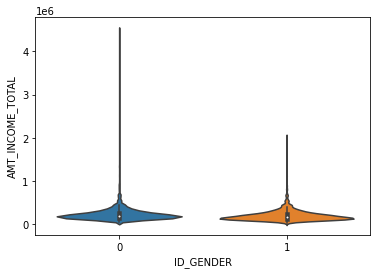

In [320]:
#分析の下準備
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#seabornでヴァイオリンプロットを描く
sns.violinplot(x='ID_GENDER', y='AMT_INCOME_TOTAL', data=df_selected_4)
plt.show()


④
特徴量　CODE_GENDER,AMT_INCOME_TOTAL
手法　決定木

auc : 0.499753937007874


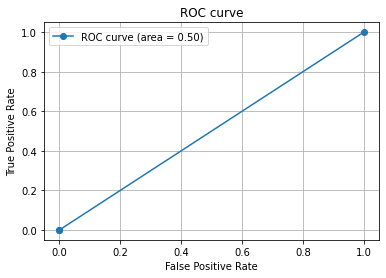

In [321]:
# DataFrameをndarrayへ変換
df_selected_4_ndarray = df_selected_4.values
# 特徴量（説明変数）をX_ndarray、正解（目的変数）をy_ndarrayというndarrayに格納
X_4_ndarray = df_selected_4_ndarray[ : , 0:2]
y_4_ndarray = df_selected_4_ndarray[ : , 2]

#インポート
from sklearn.model_selection import train_test_split
#分割
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4_ndarray, y_4_ndarray, test_size=0.25, random_state=42)
#インポート
from sklearn.preprocessing import StandardScaler
# fit_transform:パラメータ計算とデータ変換をまとめて実行
# fit:パラメータ（平均や標準偏差 etc）計算
#　transform:パラメータをもとにデータ変換
#データの標準化
scl = StandardScaler()

#学習用データで標準化
scl.fit(X_4_train) 
X_4_train_transformed = scl.transform(X_4_train)
X_4_test_transformed = scl.transform(X_4_test)


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import graphviz

dtc = DecisionTreeClassifier()
dtc.fit(X_4_train_transformed, y_4_train)
label_pred_dtc_4 = dtc.predict(X_4_test_transformed)


auc = metrics.roc_auc_score(y_4_test, label_pred_dtc_4)
# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_4_test, label_pred_dtc_4)


print("")
print("④\n特徴量　CODE_GENDER,AMT_INCOME_TOTAL\n手法　決定木")
print("")
print('auc : {}'.format(auc))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## ⑤特徴量　CODE_GENDER,CNT_CHILDREN, AMT_INCOME_TOTAL 手法　決定木

In [322]:
df_selected_5 = deleted_application_train[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'ID_GENDER', 'TARGET']]
df_selected_5

,AMT_INCOME_TOTAL,CNT_CHILDREN,ID_GENDER,TARGET
71,103500.0,0,0,0
124,202500.0,1,1,0
152,202500.0,0,1,0
161,162000.0,0,0,0
255,225000.0,1,0,1
...,...,...,...,...
307358,112500.0,2,1,0
307359,99000.0,1,1,0
307407,261000.0,1,1,1
307456,94500.0,0,1,0



⑤
特徴量　CODE_GENDER,CNT_CHILDREN, AMT_INCOME_TOTAL
手法　決定木

auc : 0.4987696850393701


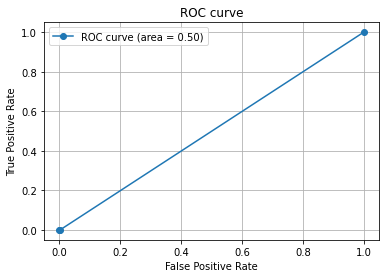

In [324]:
# DataFrameをndarrayへ変換
df_selected_5_ndarray = df_selected_5.values
# 特徴量（説明変数）をX_ndarray、正解（目的変数）をy_ndarrayというndarrayに格納
X_5_ndarray = df_selected_5_ndarray[ : , 0:3]
y_5_ndarray = df_selected_5_ndarray[ : , 3]

#インポート
from sklearn.model_selection import train_test_split
#分割
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5_ndarray, y_5_ndarray, test_size=0.25, random_state=42)
#インポート
from sklearn.preprocessing import StandardScaler
# fit_transform:パラメータ計算とデータ変換をまとめて実行
# fit:パラメータ（平均や標準偏差 etc）計算
#　transform:パラメータをもとにデータ変換
#データの標準化
scl = StandardScaler()

#学習用データで標準化
scl.fit(X_5_train) 
X_5_train_transformed = scl.transform(X_5_train)
X_5_test_transformed = scl.transform(X_5_test)


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import graphviz

dtc = DecisionTreeClassifier()
dtc.fit(X_5_train_transformed, y_5_train)
label_pred_dtc_5 = dtc.predict(X_5_test_transformed)


auc = metrics.roc_auc_score(y_5_test, label_pred_dtc_5)
# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_5_test, label_pred_dtc_5)


print("")
print("⑤\n特徴量　CODE_GENDER,CNT_CHILDREN, AMT_INCOME_TOTAL\n手法　決定木")
print("")
print('auc : {}'.format(auc))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

①
特徴量　DAYS_BIRTH, DAYS_EMPLOYED
手法　決定木
auc : 0.5125811446607962
    
②
特徴量　DAYS_BIRTH, DAYS_EMPLOYED
手法　ロジスティック回帰
auc : 0.5

③
特徴量　AMT_ANNUITY, AMT_INCOME_TOTAL
手法　決定木
auc : 0.504302954627754
    
④
特徴量　CODE_GENDER,AMT_INCOME_TOTAL
手法　決定木
auc : 0.499753937007874
    
⑤
特徴量　CODE_GENDER,CNT_CHILDREN, AMT_INCOME_TOTAL
手法　決定木
auc : 0.4987696850393701


ほとんど差を出すことができていない。
特徴量が二つでも三つでも改善はされなかった。
